# RVCGP analysis of single node behaviour

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib notebook

import tengp
import numpy as np
from gpbenchmarks import get_data
from sklearn.metrics import mean_squared_error
import random


def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)


funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(pdivide, 2)

X, y = get_data('nguyenf12', 20, -1, 1)
X = np.c_[np.ones(len(X)), X]

rv_params = tengp.Parameters(3, 1, 1, 1, funset, real_valued=True)

builder = tengp.individual.IndividualBuilder(rv_params)
bounds = builder.create().bounds[:]

In [2]:
bounds

[3, 2, 2, 3]

In [3]:
help(random.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



## Change of fitness with respect to function gene values

In [4]:
Xr = np.linspace(0, 2, num=20);
X_points, Y_points = np.meshgrid(Xr, Xr)

In [5]:
Z = []

for x_v, y_v in zip(X_points, Y_points):
    for x_, y_ in zip(x_v, y_v):
        genes = [0.5, x_, y_, 3]
        individual = rv_params.individual_class(genes, bounds, rv_params)
        output = individual.transform(X)
        individual.fitness = mean_squared_error(output, y)
        Z.append(individual.fitness)

In [6]:
X_points.shape

(20, 20)

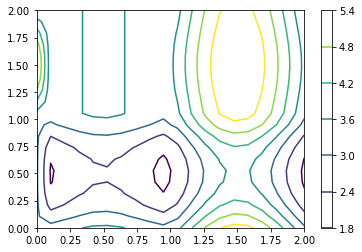

In [7]:
plt.contour(X_points, Y_points, np.array(Z).reshape(20, 20))
plt.colorbar()

<IPython.core.display.Javascript object>


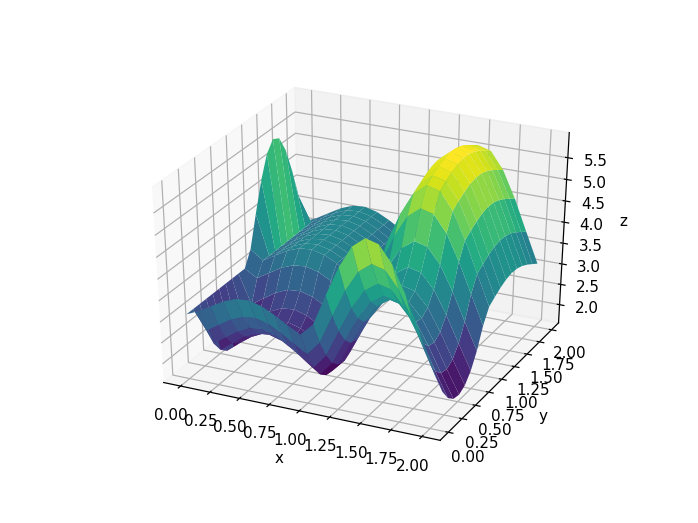

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_points, Y_points, np.array(Z).reshape(20, 20),rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Change of fitness according to function values, no smoothing

Create an individual with single node, starting with all input nodes at 0 and with function node between add and subtract and output node fixed at the only function node output.

In [12]:
Y = []
for x in np.linspace(0, 3, 0):
    genes = [x, 0.5, 1.5, 3]
    individual = rv_params.individual_class(genes, bounds, rv_params)
    output = individual.transform(X)
    individual.fitness = mean_squared_error(output, y)
    Y.append(individual.fitness)
    
plt.plot(np.linspace(0, 3, 20), Y)